In [1]:
import numpy as np
import matplotlib.pyplot as plt

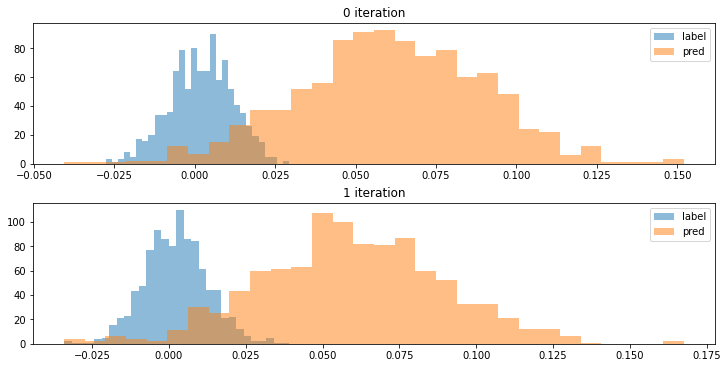

In [11]:
# knowledge 1
# subplot으로 두 개의 histgram을 겹쳐 그리기
fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10,5))
for i in range(2):
    label = np.random.normal(loc=0.002, scale=0.01, size=1000)
    pred = np.random.normal(loc=0.06, scale=0.03, size=1000)

    axes[i].hist(label, bins=30, alpha=0.5, label="label")
    axes[i].hist(pred, bins=30, alpha=0.5, label="pred")
    axes[i].set_title(f'{str(i)} iteration')
    axes[i].legend()
plt.show() 

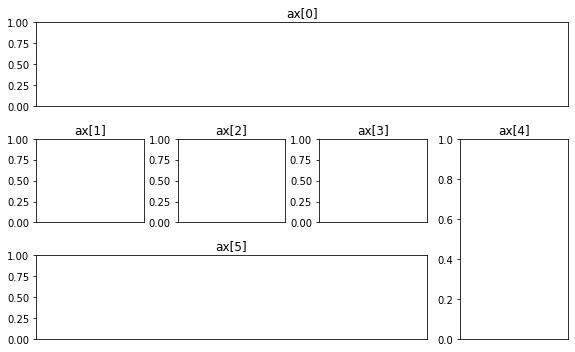

In [12]:
# knowledge 2
# plt.figure와 plt.subplot2grid를 사용해서 내가 원하는 형태로 그림 포멧을 만들어 그릴 수 있다.
fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1, rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title(f'ax[{ix}]') # ax의 title을 구분한다.
    ax[ix].set_xticks([]) # x ticks를 제거
    # ax[ix].set_yticks([]) # y ticks를 제거

fig.tight_layout()
plt.show()
# x, y ticks를 제거하면 그림이 다크 모드에서는 안보인다!!